# Key Features

In [1]:
# import useful libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('punkt')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Clarisse/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Clarisse/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# importing the data

movies=pd.read_csv('Data/movies_preprocessed.csv')
movies.head()

,Unnamed: 0,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_countries,Movie_main_genre,Character_name,Character_in_title
0,0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,['United States of America'],thriller,"['Akooshay', 'Lieutenant Melanie Ballard', 'De...",False
1,1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000,NaN,95.0,['United States of America'],thriller,"['Police Officer', 'Reporter', 'FBI Profiler R...",False
2,2,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,['United Kingdom'],thriller,NaN,NaN
3,3,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,['South Africa'],family,['Morgana'],False
4,4,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938,3600000.0,106.0,['United States of America'],art,['Roger Grant AKA Alexander'],False


### Graph title length (words, characters)

In [3]:
# Helper function to count the words in movie titles
def count_words(x):
    # remove eventual spaces at the beginning and at the end of the string, split the string, count the words
    return len(x.strip().split())

In [4]:
# Add column with title length
movies['Title_length'] = movies['Movie_name'].apply(count_words)


/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

Text(0.5, 0.98, 'Join distributions of Success & title length')

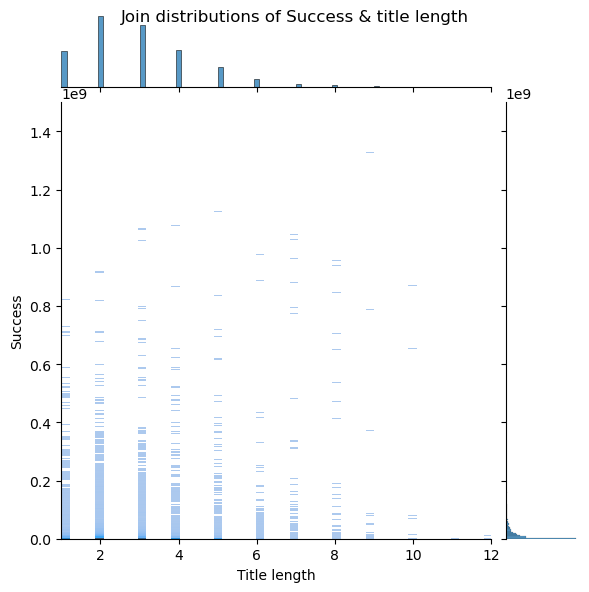

In [16]:
# Plot the join distributions of audience IMdB rating & title length
# As there are more short titles, looking only at the mean rating for each title length is biased

jplot = sns.jointplot(x='Title_length', y='Movie_box_office_revenue', data=movies, kind='hist', xlim=(1,12),ylim=(0,1500000000))
#jplot = sns.jointplot(x='Title_length', y='Audience_imdb_rating', data=cmu_imdb, kind='hist', xlim=(1,12))

plt.xlabel('Title length')
plt.ylabel('Success') # TO CHANGE WITH FINAL DATAFRAME
jplot.fig.suptitle('Join distributions of Success & title length')

In [11]:
# Add column with title length
movies['Title_characters'] = movies['Movie_name'].apply(len)


/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

Text(0.5, 0.98, 'Join distributions of Success & number of characters in title')

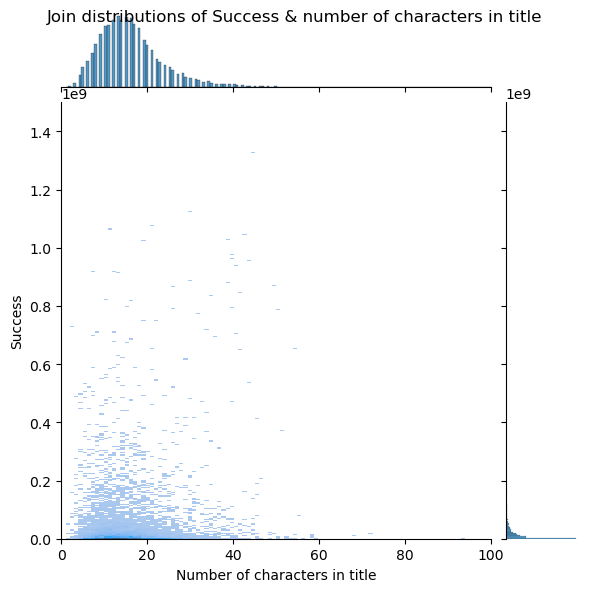

In [18]:
# Plot the join distributions of success indicator & number of characters in the title

jplot = sns.jointplot(x='Title_characters', y='Movie_box_office_revenue', data=movies, kind='hist',xlim=(0,100),ylim=(0,1500000000))

plt.xlabel('Number of characters in title')
plt.ylabel('Success') # TO CHANGE WITH FINAL DATAFRAME
jplot.fig.suptitle('Join distributions of Success & number of characters in title')

### Graph Tagging : grammatical (verbs, adjective)


In [49]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english")) # we focus on english titles only
from nltk.tokenize import sent_tokenize, word_tokenize

In [50]:
tag = {'Nouns': [], 'Pronouns': [],'Adjectives':[],
          'Verbs':[],'Adverbs':[],'Prepositions':[],
          'Conjunctions':[],'Interjections':[]}

tag_df=pd.DataFrame(data=tag)

tag_df.head()

,Nouns,Pronouns,Adjectives,Verbs,Adverbs,Prepositions,Conjunctions,Interjections


In [51]:
for i in range (0,len(movies)):

    Tags=[0,0,0,0,0,0,0,0]

    # load title
    title=movies['Movie_name'].iloc[i]
    
    # cut into individual words
    title_list=word_tokenize(title)
    
    # tagging parts of speech
    post_tags=nltk.pos_tag(title_list)
    
    Types=[]
    for word, pos_tag in post_tags:
        Types.append(pos_tag)
    

    for type in Types:
        if type.startswith('NN'):
            Tags[0]+=1
        elif type.startswith('PRP'):
            Tags[1]+=1
        elif type.startswith('JJ'):
            Tags[2]+=1
        elif type.startswith('VB'):
            Tags[3]+=1
        elif type.startswith('RB'):
            Tags[4]+=1
        elif type.startswith('IN'):
            Tags[5]+=1
        elif type.startswith('CC'):
            Tags[6]+=1
        elif type.startswith('UH'):
            Tags[7]+=1

    tag_df.loc[i]=Tags

In [52]:
len(tag_df)

26772

In [53]:
len(movies)

26772

In [54]:
movies = pd.concat([movies, tag_df], axis=1)
movies.head()

,Unnamed: 0,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_countries,Movie_main_genre,Character_name,Character_in_title,Nouns,Pronouns,Adjectives,Verbs,Adverbs,Prepositions,Conjunctions,Interjections
0,0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,['United States of America'],thriller,"['Akooshay', 'Lieutenant Melanie Ballard', 'De...",False,2,0,0,0,0,1,0,0
1,1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000,NaN,95.0,['United States of America'],thriller,"['Police Officer', 'Reporter', 'FBI Profiler R...",False,4,0,0,1,1,1,0,0
2,2,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,['United Kingdom'],thriller,NaN,NaN,2,0,0,0,0,1,0,0
3,3,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,['South Africa'],family,['Morgana'],False,2,0,0,0,0,0,0,0
4,4,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938,3600000.0,106.0,['United States of America'],art,['Roger Grant AKA Alexander'],False,3,0,0,0,0,0,0,0


### Graph NER : proper nouns (characters, dates, location)


In [ ]:
# Titles containing the main characters name

In [55]:
ner = {'ORGANIZATION': [], 'PERSON': [],'LOCATION':[],
          'DATE':[],'TIME':[],'MONEY':[], 'PERCENT':[],
          'FACILITY':[],'GPE':[]}


ner_df=pd.DataFrame(data=ner)

ner_df.head()

,ORGANIZATION,PERSON,LOCATION,DATE,TIME,MONEY,PERCENT,FACILITY,GPE


In [59]:
for i in range (0,len(movies)):
    
    NER=[0,0,0,0,0,0,0,0,0]

    # load title
    title=movies['Movie_name'].iloc[i]
    
    # cut into individual words
    title_list=word_tokenize(title)
    
    # tagging NER
    ne_tree = nltk.ne_chunk(nltk.pos_tag(title_list))

    # Access named entities and their labels

    ne_label=[]
    for subtree in ne_tree:
        if isinstance(subtree, nltk.Tree):  # Check if the subtree is a named entity
            ne_label.append(subtree.label())
            #ne_words = " ".join([word for word, pos_tag in subtree.leaves()])
            #print(f"Named Entity: {ne_words}, Label: {ne_label}")
        #else:  # Non-named entity
            #print(f"Word: {subtree[0]}, POS Tag: {subtree[1]}")

    for type in Types:
        if type=='ORGANIZATION':
            Tags[0]+=1
        elif type=='PERSON':
            Tags[1]+=1
        elif type=='LOCATION':
            Tags[2]+=1
        elif type=='DATE':
            Tags[3]+=1
        elif type=='TIME':
            Tags[4]+=1
        elif type=='MONEY':
            Tags[5]+=1
        elif type=='PERCENT':
            Tags[6]+=1
        elif type=='FACILITY':
            Tags[7]+=1
        elif type=='GPE':
            Tags[8]+=1

    ner_df.loc[i]=NER
    


In [60]:
movies = pd.concat([movies, ner_df], axis=1)
movies.head()

,Unnamed: 0,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_countries,Movie_main_genre,Character_name,...,Interjections,ORGANIZATION,PERSON,LOCATION,DATE,TIME,MONEY,PERCENT,FACILITY,GPE
0,0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,['United States of America'],thriller,"['Akooshay', 'Lieutenant Melanie Ballard', 'De...",...,0,0,0,0,0,0,0,0,0,0
1,1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000,NaN,95.0,['United States of America'],thriller,"['Police Officer', 'Reporter', 'FBI Profiler R...",...,0,0,0,0,0,0,0,0,0,0
2,2,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,['United Kingdom'],thriller,NaN,...,0,0,0,0,0,0,0,0,0,0
3,3,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,['South Africa'],family,['Morgana'],...,0,0,0,0,0,0,0,0,0,0
4,4,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938,3600000.0,106.0,['United States of America'],art,['Roger Grant AKA Alexander'],...,0,0,0,0,0,0,0,0,0,0


### Graph sentiment analysis 


In [24]:
from nltk.sentiment import SentimentIntensityAnalyzer


In [26]:
sia = SentimentIntensityAnalyzer()
L_pos=[]
L_neg=[]


for i in range(len(movies)):
    movie_name = movies.iloc[i].Movie_name
    scores = sia.polarity_scores(movie_name)
    L_pos.append(scores["pos"])
    L_neg.append(scores["neg"])


movies['pos_sentiment']=L_pos
movies['neg_sentiment']=L_neg

movies.head()

,Unnamed: 0,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_countries,Movie_main_genre,Character_name,Character_in_title,Title_length,Title_characters,pos_sentiment,neg_sentiment
0,0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,['United States of America'],thriller,"['Akooshay', 'Lieutenant Melanie Ballard', 'De...",False,3,14,0.0,0.000
1,1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000,NaN,95.0,['United States of America'],thriller,"['Police Officer', 'Reporter', 'FBI Profiler R...",False,8,53,0.0,0.402
2,2,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,['United Kingdom'],thriller,NaN,NaN,4,16,0.0,0.000
3,3,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,['South Africa'],family,['Morgana'],False,3,25,0.0,0.000
4,4,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938,3600000.0,106.0,['United States of America'],art,['Roger Grant AKA Alexander'],False,3,24,0.0,0.000


/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

Text(0.5, 0.98, 'Join distributions of Success & Positive sentiment of title')

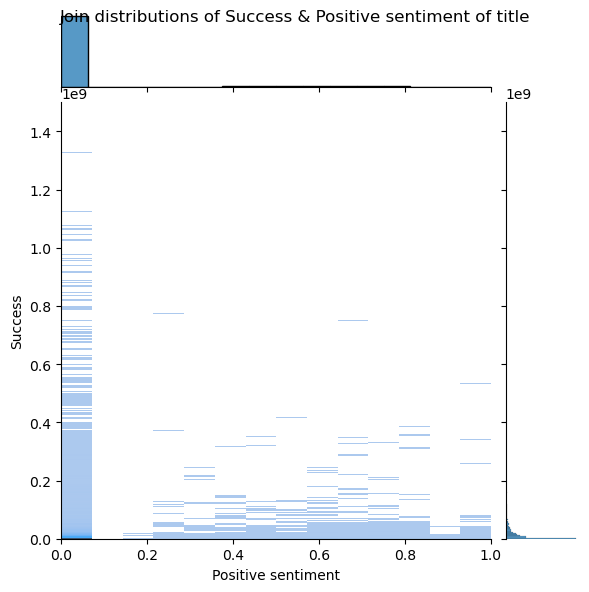

In [28]:
# Plot the join distributions of success indicator & positive sentiment of the title

jplot = sns.jointplot(x='pos_sentiment', y='Movie_box_office_revenue', data=movies, kind='hist',xlim=(0,1),ylim=(0,1500000000))

plt.xlabel('Positive sentiment')
plt.ylabel('Success') # TO CHANGE WITH FINAL DATAFRAME
jplot.fig.suptitle('Join distributions of Success & Positive sentiment of title')

/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

Text(0.5, 0.98, 'Join distributions of Success & Negative sentiment of title')

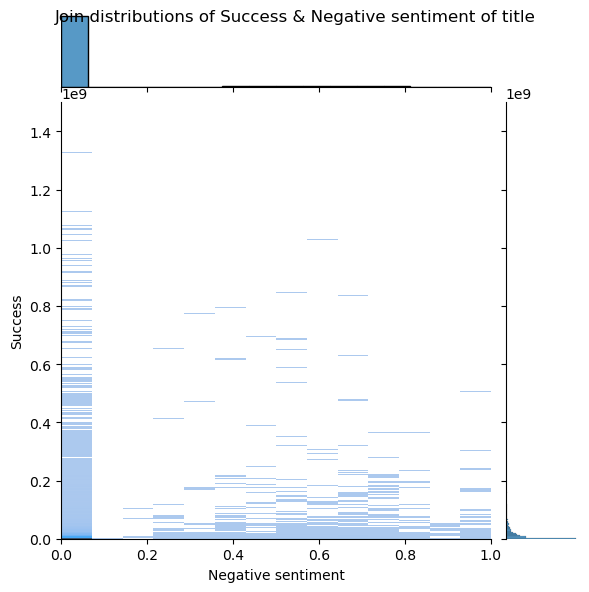

In [29]:
# Plot the join distributions of success indicator & negative sentiment of the title

jplot = sns.jointplot(x='neg_sentiment', y='Movie_box_office_revenue', data=movies, kind='hist',xlim=(0,1),ylim=(0,1500000000))

plt.xlabel('Negative sentiment')
plt.ylabel('Success') # TO CHANGE WITH FINAL DATAFRAME
jplot.fig.suptitle('Join distributions of Success & Negative sentiment of title')

### Graph document classification or topic detection

In [20]:
action_movie_lexical_field = [
    "Explosive", "Thrilling", "Intense", "Adrenaline", "Stunts",
    "Chase", "Gunfights", "Fight Sequences", "Heroic", "Showdown",
    "Combat", "Escape", "Danger", "High-octane", "Vigilante",
    "Rescue", "Martial Arts", "Suspense", "Explosions", "Tension",
    "Firepower", "Cinematic", "Gritty", "Mission", "Confrontation",
    "Underworld", "Spectacle", "Pursuit", "Tactical", "Revenge",
    "Covert Operations", "Fast-paced", "Adversary", "Urban Warfare",
    "Daring", "Climactic", "Blitzkrieg", "Onslaught", "Skirmish",
    "Vendetta", "Mayhem", "Assault", "Battle", "Clash",
    "Carnage", "Havoc", "Melee", "Rampage", "Battlefront",
    "Ambush", "Siege", "Duel", "Conflict", "Strife",
    "Renegade", "Bravery", "Insurgent", "Fugitive", "Fierce",
    "Bulletstorm", "Demolition", "Sniper", "Crisis", "Tough-as-nails",
    "Hand-to-hand Combat", "Struggle", "Infiltration", "Strategic", "Dynamic",
    "Prowess", "Conspirator", "Flashpoint", "Perseverance", "Sudden",
    "Stealth", "Commando", "Espionage", "Precision", "Vanguard",
    "Reckless", "Hostile", "Combatant", "Intrepid", "Tumult",
    "Audacity", "Escapade", "Surging", "Raucous", "Paragon",
    "Impetus", "Onrush", "Frenetic", "Stalwart", "Incursion",
    "Ruckus", "Zeal", "Vortex", "Upheaval", "Bedlam", "Strain"
]
action_movie_lexical_field = list(set(action_movie_lexical_field))

adventure_movie_lexical_field = [
    "Epic", "Journey", "Quest", "Exploration", "Discovery",
    "Expedition", "Thrilling", "Adventurous", "Quest", "Odyssey",
    "Discovery", "Exploration", "Exhilarating", "Perilous", "Legendary",
    "Daring", "Heroic", "Escapade", "Venture", "Exotic",
    "Discovery", "Challenges", "High-stakes", "Uncharted", "Exploits",
    "Action-packed", "Enigmatic", "Mysterious", "Pioneering", "Unexplored",
    "Unknown", "Explorers", "Voyage", "Daring", "Risks",
    "Questing", "Adrenaline", "Landscapes", "Vast", "Untamed",
    "Wilderness", "Jungle", "Mountainous", "Desert", "Seafaring",
    "Nautical", "High-seas", "Cinematic", "Immersive", "Enthralling",
    "Suspenseful", "Discovery", "Epic-scale", "Monumental", "Undiscovered",
    "Wonder", "Panoramic", "Breathtaking", "Journey", "Escapades",
    "Exploratory", "Unknown", "Uncharted", "Excursion", "High-adventure",
    "Traverse", "Bold", "Questing", "Intriguing", "Trailblazing",
    "Unfolding", "Unraveling", "Mythical", "Enchanted", "Unearth",
    "Quixotic", "Stirring", "Vivid", "Expeditionary", "Bold",
    "Voyaging", "Peril", "Quester", "Forefront", "Endeavor",
    "Pioneering", "Enterprising", "Questing", "Safari", "Epic",
    "Legendary", "Voyager", "Discovery", "Odyssey", "Mythical",
    "Fabled", "Ethereal", "Intrigue", "Vista", "Daring",
    "Fascination", "Enigma", "Intricacy", "Marvel", "Prowess",
    "Pioneer", "Risk-taker", "Challenge", "Adventure-seeker", "Discovery"
]
adventure_movie_lexical_field= list(set(adventure_movie_lexical_field))

art_movie_lexical_field = [
    "Harmony", "Melody", "Symphony", "Concert", "Performance",
    "Masterpiece", "Gallery", "Exhibition", "Artistic", "Creative",
    "Expression", "Innovation", "Aesthetics", "Imagery", "Composition",
    "Rhythm", "Dance", "Ballet", "Opera", "Theatrical",
    "Literature", "Novel", "Poetry", "Prose", "Fiction",
    "Nonfiction", "Verse", "Song", "Lyric", "Genre",
    "Plot", "Character", "Setting", "Narration", "Theme",
    "Tone", "Style", "Classic", "Modern", "Avant-garde",
    "Impressionism", "Surrealism", "Realism", "Abstract", "Expressionism",
    "Symbolism", "Diction", "Sonnet", "Haiku", "Narrative",
    "Symbol", "Allegory", "Dialogue", "Monologue", "Soliloquy",
    "Metaphor", "Simile", "Alliteration", "Personification", "Hyperbole",
    "Irony", "Paradox", "Satire", "Comedy", "Tragedy",
    "Drama", "Performance", "Entertainment", "Spectacle", "Stagecraft",
    "Visuals", "Inspirational", "Collaboration", "Experimentation", "Fusion",
    "Interpretation", "Medium", "Creative", "Author", "Composer",
    "Lyricist", "Choreographer", "Imaginative", "Inspiration", "Enchantment",
    "Intrigue", "Elegance", "Visionary", "Expressive", "Poignant",
    "Evocative", "Captivating", "Resonance", "Emotion", "Atmosphere",
    "Innovative", "Immersive", "Imagination", "Muse", "Compelling",
    "Reflective", "Thought-provoking", "Sensual", "Ethereal", "Timeless"
]
art_movie_lexical_field = list(set(art_movie_lexical_field))

comedy_movie_lexical_field = [
    "Humor", "Laughter", "Comedy", "Hilarious", "Wit",
    "Satire", "Farce", "Spoof", "Parody", "Slapstick",
    "Zany", "Jovial", "Whimsical", "Amusing", "Lighthearted",
    "Witty", "Joke", "Gag", "Chuckle", "Jest",
    "Prank", "Whoopee", "Mischief", "Mirth", "Jest",
    "Quip", "Banter", "Wisecrack", "Irony", "Sarcasm",
    "Puns", "Joviality", "Hilarity", "Comical", "Jocular",
    "Playful", "Jesting", "Fun", "Rib-tickling", "Guffaw",
    "Laughable", "Silly", "Absurd", "Ridiculous", "Eccentric",
    "Quirky", "Eccentricity", "Droll", "Buffoonery", "Antics",
    "Clumsy", "Irreverent", "Giggles", "Merriment", "Jollity",
    "Drollery", "Hilarity", "Grotesque", "Waggish", "Buffoonish",
    "Hijinks", "Foolery", "Ludicrous", "Giggly", "Jesting",
    "Jocund", "Silly", "Ridicule", "Silliness", "Gaiety",
    "Jolly", "Gleeful", "Frolicsome", "Joyful", "Laughing",
    "Giggling", "Cheerful", "Happy", "Merry", "Mirthful",
    "Amused", "Whimsy", "Entertaining", "Playfulness", "Hysterical",
    "Jestful", "Waggishness", "Teasing", "Facetious", "Light-hearted",
    "Chuckler", "Giggler", "Hilarity", "Drollness", "Joking",
    "Gag-filled", "Whimsy", "Amusement", "Jestfulness", "Chuckler",
    "Giggler", "Merriment", "Mirthfulness", "Jestfulness", "Jokiness",
    "Humerous", "Whimsicality", "Playful", "Farcical", "Jocose",
    "Witty", "Irreverent", "Ridiculous", "Ludicrousness", "Waggishness"
]
comedy_movie_lexical_field = list(set(comedy_movie_lexical_field))


drama_movie_lexical_field = [
    "Tragedy", "Conflict", "Emotional", "Relationships", "Struggle",
    "Heartbreak", "Loss", "Tension", "Sacrifice", "Resilience",
    "Triumph", "Betrayal", "Redemption", "Intense", "Character",
    "Strife", "Profound", "Raw", "Impactful", "Cinematic",
    "Journey", "Crisis", "Confrontation", "Moving", "Compelling",
    "Powerful", "Challenge", "Resolution", "Inspiration", "Captivating",
    "Human condition", "Poignant", "Inner conflict", "Dynamics", "Growth",
    "Realism", "Decision", "Reflection", "Ambition", "Desperation",
    "Emotion", "Multidimensional", "Inner turmoil", "Relationship", "Gripping",
    "Soul-stirring", "Unresolved", "Beauty", "Ambiguous", "Unflinching",
    "Introspection", "Life-changing", "Dilemma", "Moral", "Identity",
    "Self-discovery", "Suffering", "Empathy", "Striving", "Ambition",
    "Desperation", "Drama", "Pivotal", "Twists", "Vivid",
    "Depiction", "Immersion", "Affecting", "Exploration", "Sensational",
    "Tragic", "Mysterious", "Dramatic", "Poignant", "Unpredictable",
    "Resonant", "Complicated", "Stunning", "Cinematic", "Masterclass",
    "Human", "Emotionally", "Evocative", "Character", "Raw",
    "Authenticity", "Genuine", "Experiences", "Turbulent", "Searing",
    "Thoughtful", "Brilliance", "Intimate", "Gripping", "Masterclass",
    "Impactful", "Storytelling", "Nuanced", "Potent", "Stirring",
    "Unsettling", "Harsh", "Atmosphere", "Challenging", "Pensive",
    "Soul-searching", "Cinematography", "Exploration", "Realism", "Compelling",
    "Human", "Emotionally", "Turbulent", "Searing", "Impactful",
    "Captivating", "Stunning", "Gripping", "Intricate", "Unpredictable",
    "Soul-stirring", "Emotional", "Resonance", "Complex", "Affecting",
    "Journey", "Character", "Depth", "Cinematic", "Excellence",
    "Awe-inspiring", "Performances", "Compelling", "Dynamics", "Resonant",
    "Gut-wrenching", "Transcendent", "Experience", "Impactful", "Development",
    "Harsh", "Realities", "Ambiguous", "Resolutions", "Soul-searching",
    "Impactful", "Cinematography", "Exploration", "Realism", "Compelling",
    "Human", "Emotionally", "Turbulent", "Searing", "Impactful"
]
drama_movie_lexical_field = list(set(drama_movie_lexical_field))


opinion_political_movie_lexical_field = [
    "Political", "Opinion", "Government", "Power", "Ideology",
    "Activism", "Controversy", "Policy", "Election", "Social",
    "Injustice", "Advocacy", "Leadership", "Corruption", "Debate",
    "Perspective", "Partisanship", "Revolution", "Democracy", "Authoritarianism",
    "Crisis", "Protest", "Civil Liberties", "Public Policy", "Political Drama",
    "Governmental", "Political System", "Reform", "Oppression", "Voices",
    "Resistance", "Diplomacy", "Authority", "Thriller", "Public Opinion",
    "Policy-making", "Climate", "Advocacy", "Propaganda", "Conflict",
    "Allegory", "Corruption", "Movement", "Unrest", "Satire",
    "Activism", "Civil Rights", "Campaign", "Revolution", "Upheaval",
    "Intrigue", "Dissent", "Political Landscape", "Rivalry", "Strategy",
    "Divide", "Decision", "Discontent", "Theater", "Vision",
    "Standoff", "Philosophy", "Insight", "Legacy", "Ethics",
    "Protest", "Critique", "Visionary", "Revolution", "Debate",
    "Dissent", "Thriller", "Strategy", "Protest", "Commentary",
    "Movement", "Revolution", "Upheaval", "Dissent", "Allegory"
]

opinion_political_movie_lexical_field = list(set(opinion_political_movie_lexical_field))

family_friendly_movie_lexical_field = [
    "Adventure", "Fantasy", "Animation", "Family", "Children",
    "Comedy", "Magic", "Friendship", "Wholesome", "Enchanting",
    "Imagination", "Joyful", "Heartwarming", "Animated", "Cartoon",
    "Lighthearted", "Cheerful", "Innocent", "Charming", "Magical",
    "Playful", "Adorable", "Fantasy", "Wonder", "Childhood",
    "Fun", "Entertaining", "Moral", "Colorful", "Laugh",
    "Smile", "Happiness", "Immersive", "Inspiring", "Imaginative",
    "Cute", "Sweet", "Heroic", "Dreamy", "Optimistic",
    "Vibrant", "Whimsical", "Fairy tale", "Excitement", "Inclusive",
    "Heartfelt", "Chuckle", "Feel-good", "Positive", "Caring",
    "Uplifting", "Journey", "Bravery", "Wonderment", "Epic",
    "Spectacle", "Gentle", "Fable", "Clever", "Imaginary",
    "Fanciful", "Cartoonish", "Creative", "Silly", "Fantasy",
    "Adventure", "Humorous", "Wholesome", "Storytelling", "Lively",
    "Innocence", "Values", "Realm", "Kid-friendly", "Adventurous",
    "Wonder-filled", "Animation", "Feature", "Entertaining", "Charm",
    "Moments", "Giggle", "Bright", "Creativity", "Whimsy",
    "Landscape", "Feel-good", "Magic", "Cinematic magic", "Entertainment",
    "Characters", "Fantasy journey"
]
family_friendly_movie_lexical_field = list(set(family_friendly_movie_lexical_field))


fiction_movie_lexical_field = [
    "Science", "Fiction", "Fairy", "Tale", "Fictional",
    "Film", "Medical", "Mythological", "Fantasy", "Sci-Fi",
    "Sword", "Sorcery", "Time", "Travel", "Supernatural",
    "Alien", "Invasion", "Zombie", "Fantasy", "Disaster",
    "Fan", "Film", "Adventure", "Imagination", "Otherworldly",
    "Alternate", "Reality", "Extraterrestrial", "Futuristic", "Speculative",
    "Time-bending", "Magic", "Enchanting", "Epic", "Mythical",
    "Surreal", "Unreal", "Dreamlike", "Mystical", "Paranormal",
    "Magical", "Realism", "Timeless", "Enigmatic", "Fantastical",
    "Supernatural", "Alien", "Worlds", "Parallel", "Universes",
    "Dystopian", "Utopian", "Space", "Exploration", "Interstellar",
    "Time", "Warp", "Parallel", "Realities", "Sorcery",
    "Conjuring", "Mythical", "Beings", "Fable", "Fanciful",
    "Unearthly", "Time", "Paradox", "Extraterrestrial", "Life",
    "Temporal", "Distortion", "Reality-bending", "Immersive", "Unconventional",
    "Astrological", "Galactic", "Time", "Conundrum", "Magical",
    "Creatures", "Parallel", "Dimensions", "Mind-bending", "Ethereal",
    "Phantasmagorical", "Alien", "Abduction", "Time", "Manipulation",
    "Enchanted", "Extraterrestrial", "Visitors", "Spectral", "Mystifying",
    "Astounding", "Phenomenal", "Dimensional", "Travel", "Parallel",
    "Existence", "Cosmic", "Mythopoeic", "Astrophysical", "Enigmatic",
    "Narratives", "Zombified", "Fantasy", "Realms", "Apocalyptic",
    "Time", "Anomaly", "Futuristic", "Technology", "Timeless",
    "Tale", "Unearthly", "Adventures", "Supernatural", "Wonders",
    "Time", "Capsule", "Time", "Dilation", "Alternate",
    "Dimensions", "Timeless", "Wonder", "Galactic", "Explorations",
    "Fanciful", "Journeys", "Sorcerous", "Mythopoeic", "Worlds",
    "Fantastical", "Realities", "Magical", "Adventures", "Time",
    "Loop", "Astrological", "Marvels", "Epic", "Quests",
    "Interdimensional", "Ethereal", "Beauty", "Timeless", "Classic",
    "Astrophysical", "Marvels", "Mythical", "Creatures", "Fantasy",
    "Worlds", "Timeless", "Fantasy", "Cosmic", "Adventures",
    "Imaginary", "Realms", "Galactic", "Quests", "Otherworldly",
    "Phenomena", "Temporal", "Conundrum", "Supernatural", "Beings"
]
fiction_movie_lexical_field = list(set(fiction_movie_lexical_field))


historical_movie_lexical_field = [
    "Short", "Film", "Historical", "Fiction", "Period",
    "Piece", "History", "Biographical", "British", "Empire",
    "Epic", "Cold", "War", "Documentaries", "Biography",
    "Biopic", "Feature", "Netherlands", "World", "II",
    "Gulf", "Movies", "Gladiators", "Drama", "Sponsored",
    "Ancient", "Civilization", "Medieval", "Renaissance", "Revolution",
    "Monarchy", "Colonial", "Exploration", "Discovery", "Warfare",
    "Conflict", "Cultural", "Heritage", "Time", "Era",
    "Costume", "Setting", "Political", "Social", "Cultural",
    "Ceremony", "Tradition", "Ruler", "Empire", "Kingdom",
    "Regime", "Revolt", "Uprising", "Resistance", "Struggle",
    "Conquest", "Dynasty", "Invasion", "Siege", "Alliance",
    "Peasant", "Noble", "Rural", "Urban", "Economy",
    "Trade", "Customs", "Beliefs", "Religion", "Faith",
    "Persecution", "Treaty", "Diplomacy", "Betrayal", "Alliance",
    "Power", "Strife", "Reform", "Change", "Legacy",
    "Artifact", "Archaeology", "Heritage", "Descendants", "Ancestry",
    "Journey", "Exploration", "Trade", "Discovery", "Frontier",
    "Settlement", "Expedition", "Discoverer", "Navigator", "Explorer",
    "Historian", "Chronicler", "Narrative", "Recreation", "Representation"
]
historical_movie_lexical_field = list(set(historical_movie_lexical_field))


horror_movie_lexical_field = [
    "Horror", "Movies", "Natural", "Film", "Sci-fi",
    "Road", "Creature", "Monster", "Slasher", "Thriller",
    "Suspense", "Supernatural", "Paranormal", "Terror", "Fright",
    "Spooky", "Eerie", "Chiller", "Scream", "Nightmare",
    "Dread", "Macabre", "Creepy", "Gory", "Gothic",
    "Dark", "Sinister", "Fear", "Shiver", "Blood-curdling",
    "Bone-chilling", "Hair-raising", "Spine-tingling", "Creepiness", "Startle",
    "Menace", "Apparition", "Phantom", "Wraith", "Specter",
    "Haunting", "Nightmarish", "Freaky", "Unsettling", "Otherworldly",
    "Ghastly", "Frightening", "Eerie", "Ghostly", "Apprehension",
    "Dismay", "Dreadful", "Horrendous", "Horrifying", "Monstrous",
    "Abominable", "Terrifying", "Chilling", "Gruesome", "Repulsive",
    "Ghoul", "Zombie", "Witch", "Vampire", "Werewolf",
    "Demon", "Satanic", "Possession", "Haunted", "Cursed",
    "Malevolent", "Macabre", "Supernatural", "Occult", "Occurrence",
    "Bizarre", "Freakish", "Strange", "Unnatural", "Aberration",
    "Anomaly", "Devilish", "Sinister", "Eldritch", "Fearful",
    "Bloodthirsty", "Deadly", "Fatal", "Grisly", "Grim",
    "Harrowing", "Infernal", "Deathly", "Sinister", "Unholy",
    "Wicked", "Eerie", "Spooky", "Unearthly", "Cemetery",
    "Cryptic", "Ominous", "Petrifying", "Demonic", "Macabre",
    "Mysterious", "Sinister", "Chaos", "Nightfall", "Midnight",
    "Darkness", "Malevolence", "Coven", "Dystopian", "Post-apocalyptic"
]
horror_movie_lexical_field = list(set(horror_movie_lexical_field))


romance_movie_lexical_field = [
    "Romance", "Love", "Passion", "Affection", "Relationship",
    "Heartfelt", "Emotional", "Intimate", "Connection", "Chemistry",
    "Tenderness", "Devotion", "Adoration", "Commitment", "Sentimental",
    "Soulmate", "Desire", "Closeness", "Warmth", "Couples",
    "Heartwarming", "Amorous", "Flirtation", "Courtship", "Endearment",
    "Yearning", "Fondness", "Infatuation", "Serenade", "Lovers",
    "Sweetheart", "Enchantment", "Passionate", "Happiness", "Eternal",
    "Joyful", "Gentle", "Charming", "Sweeping", "Embrace",
    "Whisper", "Breathtaking", "Enamored", "Candlelit", "Romanticism",
    "Cherish", "Connection", "Blissful", "Tender", "Hearts",
    "Lovebird", "Intimacy", "Sentiment", "Swoon", "Elope",
    "Captivating", "Admiration", "Dreamy", "Amour", "Fairy-tale",
    "Honeymoon", "Passionate", "Heartfelt", "Sensual", "Kiss",
    "Dreamy", "Poetic", "Seductive", "Flame", "Lust",
    "Intrigue", "Dreamlike", "Enchanted", "Cinema", "Wooing",
    "Dazzling", "Luminous", "Ephemeral", "Quixotic", "Serendipity",
    "Bliss", "Butterflies", "Giddy", "Infinite", "Adorned",
    "Infatuation", "Charm", "Sincerity", "Gaze", "Whirlwind",
    "Beloved", "Hug", "Giddy", "Infinite", "Amaze",
    "Rendezvous", "Rapture", "Magnetic", "Velvet", "Adorned",
    "Yearn", "Eternal", "Cuddle", "Swept", "Wistful"
]

romance_movie_lexical_field = list(set(romance_movie_lexical_field))

sports_movie_lexical_field = [
    "Sports", "Athletics", "Competition", "Team", "Victory",
    "Champion", "Challenge", "Adversity", "Triumph", "Defeat",
    "Determination", "Training", "Strive", "Achievement", "Rivalry",
    "Mentor", "Underdog", "Inspiration", "Dedication", "Grit",
    "Courage", "Glory", "Conquer", "Passion", "Commitment",
    "Game", "Athlete", "Intensity", "Drive", "Perseverance",
    "Goal", "Win", "Loss", "Struggle", "Motivation",
    "Teamwork", "Spirit", "Endurance", "Sporting", "Event",
    "Stamina", "Challenge", "Vigorous", "Discipline", "Victorious",
    "Courageous", "Thrilling", "Inspire", "Passionate", "Courage",
    "Sweat", "Heart", "Drama", "Intensity", "Achieve",
    "Skill", "Training", "Competitive", "Grit", "Challenge",
    "Determination", "Inspiring", "Athleticism", "Endeavor", "Perseverance",
    "Hardship", "Conquest", "Prowess", "Rival", "Tribulation",
    "Camaraderie", "Adrenaline", "Gladiatorial", "Confrontation", "Striving",
    "Tenacity", "Spectacle", "Showdown", "Pinnacle", "Courage",
    "Gutsy", "Strategic", "Stalwart", "Steadfast", "Tenacious",
    "Valiant", "Resilient", "Unyielding", "Indomitable", "Fierce",
    "Adversarial", "Overcome", "Aspiration", "Clash", "Match",
    "Exertion", "Physicality", "Rigorous", "Pursuit", "Ambition",
    "Resolve", "Test", "Contest", "Journey", "Conqueror"
]

sports_movie_lexical_field = list(set(sports_movie_lexical_field))


thriller_movie_lexical_field = [
    "Thriller", "Suspense", "Mystery", "Tension", "Intensity",
    "Plot", "Drama", "Action", "Intrigue", "Crisis",
    "Conspiracy", "Enigma", "Cliffhanger", "Unexpected", "Adrenaline",
    "Chase", "Danger", "Sudden", "Panic", "Foreboding",
    "Gripping", "Eerie", "Menacing", "Cryptic", "Unsettling",
    "Cinematic", "Riddle", "Puzzling", "Mind-bending", "Nail-biting",
    "Sinister", "Chilling", "Dark", "Compelling", "Mysterious",
    "Suspicious", "Twist", "Turn", "Puzzle", "Psychological",
    "Dread", "Anxiety", "Mistrust", "Paranoia", "Obscure",
    "Cunning", "Surprise", "Sneak", "Taut", "Concealed",
    "Fear", "Prowl", "Heart-pounding", "Enigmatic", "Cryptic",
    "Doubt", "Apprehension", "Maze", "Risky", "Revelation",
    "Ominous", "Creepy", "Peril", "Obsession", "Hidden",
    "Reckoning", "Menace", "Covert", "Clandestine", "Uncertainty",
    "Prelude", "Unveil", "Unpredictable", "Challenging", "Intricate",
    "Decipher", "Investigate", "Neurotic", "Stalking", "Sleuth",
    "Mistrust", "Enshroud", "Envelop", "Ambiguity", "Sly",
    "Furtive", "Shadowy", "Stealthy", "Provocative", "Piquant",
    "Thrill", "Forewarning", "Uncanny", "Edgy", "Risky",
    "Edgy", "Risk", "Jolt", "Pulse-pounding", "Uncanny",
    "Obscure", "Mysterious", "Secretive", "Unrevealed", "Veiled",
    "Veiled", "Covered", "Masked", "Hidden", "Cloaked"
]
thriller_movie_lexical_field = list(set(thriller_movie_lexical_field))


western_movie_lexical_field = [
    "Western", "Cowboy", "Frontier", "Saloon", "Gunfight",
    "Outlaw", "Sheriff", "Ranch", "Dusty", "Horse",
    "Cattle", "Wagon", "Desert", "Spur", "Saddle",
    "Lasso", "Rodeo", "Wrangler", "Trail", "Vigilante",
    "Bandit", "Posse", "Pioneer", "Gold rush", "Prospector",
    "Marshal", "Duel", "Chase", "Prairie", "Homestead",
    "Stagecoach", "Stampede", "Corral", "Stetson", "Cattle drive",
    "Campfire", "Revolver", "Saloon", "Desperado", "High noon",
    "Shootout", "Gunslinger", "Wasteland", "Chaps", "Frontiersman",
    "Cactus", "Boomtown", "Sarsaparilla", "Bounty", "Wrangle",
    "Dust", "Canyon", "Sunset", "Homesteader", "Grit",
    "Range", "Buckaroo", "Rustler", "Wrangling", "Marshal",
    "Lawman", "Varmint", "Vaquero", "Giddy-up", "Hooves",
    "Bonanza", "Chisholm", "Draw", "Buffalo", "Stallion",
    "Hideout", "Land rush", "Desperado", "Sunrise", "Pecos",
    "Roundup", "Prospect", "Tumbleweed", "Roaming", "Sierra",
    "Homestead", "Cattleman", "Pony", "Nomad", "Sunshine",
    "Leather", "Outlawed", "Drover", "Sunset", "Wanderer",
    "Wrangler", "Wrangle", "Wagon train", "Lone", "Brand",
    "Bounty", "Hoedown", "Buckskin", "Gambler", "Poker",
    "Frontierswoman", "Drovers", "Galloping", "Desperado", "Rifle",
    "Stagecoach", "Gold mine", "Lariat", "Homestead"
]

western_movie_lexical_field = list(set(western_movie_lexical_field))


world_cinema_lexical_field = [
    "Global", "Journey", "Cultural", "Nomad", "Odyssey",
    "Heritage", "Melting Pot", "Harmony", "Bridges", "Voyage",
    "Diversity", "Mosaic", "Parallel", "Discovery", "Tapestry",
    "Unity", "Exploration", "Fusion", "Epic", "Exotic",
    "Quest", "Multicultural", "Synchronicity", "Cinematic", "Panorama",
    "Vista", "Intersection", "Cinéaste", "Nomadic", "Transcendent",
    "Auteur", "Collage", "Mélange", "Inclusive", "Globalization",
    "Spectrum", "Confluence", "Synchrony", "Interwoven", "Metamorphosis",
    "Chorus", "Pan-global", "Interplay", "Mélange", "Juxtapose",
    "Crossover", "Intersection", "Panoramic", "Inclusivity", "Bicultural",
    "Multiregional", "Multinational", "Worldview", "Cinephile", "Polyglot",
    "Peregrination", "Folklore", "Intercultural", "Anthology", "Citizen",
    "Amalgamation", "Pluralistic", "Amalgamation", "Nomadic", "Eclectic",
    "Transnational", "Anthology", "Polyglot", "Cosmopolitan", "Synthesis",
    "Farrago", "Odyssey", "Tapestry", "Diversity", "Cinematic",
    "Epic", "Crossover", "Synchrony", "Cultural", "Melting Pot",
    "Voyage", "Intersection", "Cinéaste", "Transcendent", "Auteur",
    "Collage", "Mélange", "Globalization", "Spectrum", "Confluence",
    "Chorus", "Pan-global", "Interplay", "Juxtapose", "Crossover",
    "Intersection", "Panoramic", "Inclusivity", "Multiregional", "Multinational",
    "Worldview", "Cinephile", "Folklore", "Anthology", "Polyglot"
]

world_cinema_lexical_field = list(set(world_cinema_lexical_field))

war_film_lexical_field = [
    "War", "Conflict", "Battle", "Combat", "Struggle",
    "Soldier", "Warrior", "Troop", "Deployment", "Campaign",
    "Trench", "Frontline", "Barracks", "Armored", "Battleground",
    "Casualty", "Heroism", "Resilience", "Victory", "Defeat",
    "Warfare", "Strategy", "Tactics", "Firepower", "Mobilization",
    "Alliance", "Invasion", "Occupation", "Hostility", "Battlefield",
    "Mission", "Operation", "Strife", "Siege", "Conquest",
    "Ceasefire", "Truce", "Reconnaissance", "Muster", "Nuclear",
    "Destruction", "Conflict zone", "Conscription", "Draft", "Allied",
    "Axis", "Warlord", "Insurgency", "Resistance", "Paratrooper",
    "Guerrilla", "Surrender", "Occupied", "Infiltration", "Shellshock",
    "Armistice", "Militant", "Enlistment", "Crisis", "Retaliation",
    "Rebellion", "Commander", "Martyr", "Peacekeeper", "Holocaust",
    "Infantry", "Cavalry", "Bunker", "Air raid", "Navy",
    "Aerial", "Landmine", "Missile", "Barricade", "Muster",
    "Doctrine", "Rations", "Atrocity", "Civilian", "Collateral",
    "Mobilize", "Veteran", "Paramilitary", "Neutrality", "Deterrence",
    "Warplane", "Nuclear fallout", "Disarmament", "Tragedy", "Genocide",
    "Foreign legion", "Siege", "Rifle", "Artillery", "Outpost",
    "Munitions", "Draft", "Naval", "Deployment", "Landmark",
    "Allied", "Prisoner", "Detainee", "Invasion", "Mobilization",
    "Retreat", "Conquer", "Counterattack", "Insurgency", "Outgunned"
]

war_film_lexical_field = list(set(war_film_lexical_field))


In [21]:
# create training set

train_data=[(action_movie_lexical_field, "Action"),(adventure_movie_lexical_field, "Adventure", (art_movie_lexical_field), "Art"),
            (comedy_movie_lexical_field, "Comedy"), (drama_movie_lexical_field, "Drama"), (opinion_political_movie_lexical_field, "Opinion"),
            (family_friendly_movie_lexical_field, "Family"), (fiction_movie_lexical_field, "Fiction"), 
            (historical_movie_lexical_field, "Historical"), (horror_movie_lexical_field, "Horror"), (romance_movie_lexical_field, "Romance"),
            (sports_movie_lexical_field, "Sport"), (thriller_movie_lexical_field, "Thriller"), (western_movie_lexical_field, "Western"),
            (world_cinema_lexical_field, "World"), (war_film_lexical_field, "War")
            ]

In [ ]:
# preparing the testing set

# Tokenize the documents.
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english")) # we focus on english titles only

def filter_stop_words(text_list):
    filtered_list = []
    for word in text_list:
        if word.casefold() not in stop_words:
                filtered_list.append(word)

    return(filtered_list)

# 
titles=movies.Movie_name

# Split the documents into tokens.

tokenizer = RegexpTokenizer(r'\w+')

for idx in range(len(titles)):
    titles[idx] = titles[idx].lower()  # Convert to lowercase.
    titles[idx] = word_tokenize(titles[idx])  # Split into words.


# Remove numbers, but not words that contain numbers.
titles = [[token for token in title if not token.isnumeric()] for title in titles]

# Remove words that are only one character.
titles = [[token for token in title if len(token) > 1] for title in titles]


# Remove stopwords.
titles = [filter_stop_words(title) for title in titles]


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
titles

In [ ]:
Xtrain, Ytrain= titles

In [ ]:
train_data=titles
# Extract features (words) and labels from training data
X, y = zip(*train_data)

# Convert the lists of words into text documents
X = [' '.join(words) for words in X]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

# Make predictions on the test set
predictions = classifier.predict(X_test_vectorized)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

In [32]:
def classify_document(document, vocabulary_lists):
    # Combine all sentences in the document into one string
    document_text = ' '.join(document).lower()
    
    cat=[]
    for category, word_list in vocabulary_lists.items():
        for word in word_list:
            if word in document_text:
                cat.append(category)
    return cat

# Vocabulary lists
vocab={"Action": [word.lower() for word in action_movie_lexical_field],
            "Adventure": [word.lower() for word in adventure_movie_lexical_field], 
            "Art": [word.lower() for word in art_movie_lexical_field],
            "Comedy":[word.lower() for word in comedy_movie_lexical_field], 
            "Drama": [word.lower() for word in drama_movie_lexical_field], 
            "Opinion": [word.lower() for word in opinion_political_movie_lexical_field],
            "Family": [word.lower() for word in family_friendly_movie_lexical_field], 
            "Fiction": [word.lower() for word in fiction_movie_lexical_field], 
            "Historical": [word.lower() for word in historical_movie_lexical_field], 
            "Horror": [word.lower() for word in horror_movie_lexical_field], 
            "Romance": [word.lower() for word in romance_movie_lexical_field],
            "Sport": [word.lower() for word in sports_movie_lexical_field], 
            "Thriller": [word.lower() for word in thriller_movie_lexical_field], 
            "Western": [word.lower() for word in western_movie_lexical_field],
            "World": [word.lower() for word in world_cinema_lexical_field], 
            "War": [word.lower() for word in war_film_lexical_field]
}

# Example documents to classify
documents_to_classify = titles

# Classify each document and print the result
i=0
for title in titles:
    category = classify_document(title, vocab)
    print(f'Document: "{movies.Movie_name.iloc[i]}" is classified in "{category}"')
    i+=1


Document: "['ghosts', 'of', 'mars']" is classified in "[]"
Document: "['getting', 'away', 'with', 'murder', ':', 'the', 'jonbenét', 'ramsey', 'mystery']" is classified in "['Thriller']"
Document: "['white', 'of', 'the', 'eye']" is classified in "[]"
Document: "['the', 'sorcerer', "'s", 'apprentice']" is classified in "[]"
Document: "['alexander', "'s", 'ragtime', 'band']" is classified in "['Fiction', 'Historical']"
Document: "['city', 'of', 'the', 'dead']" is classified in "[]"
Document: "['sarah', 'and', 'son']" is classified in "[]"
Document: "['little', 'city']" is classified in "[]"
Document: "['henry', 'v']" is classified in "[]"
Document: "['mary', 'poppins']" is classified in "[]"
Document: "['keep', 'the', 'change']" is classified in "['Historical']"
Document: "['new', 'rose', 'hotel']" is classified in "[]"
Document: "['middle', 'age', 'spread']" is classified in "[]"
Document: "['baby', 'boy']" is classified in "[]"
Document: "['they', 'knew', 'what', 'they', 'wanted']" is c